In [2]:
import nideconv
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

reg = re.compile('.*/(?P<ds>ds-[0-9]+)/sub-(?P<subject>[0-9]+)_run-(?P<run>[0-9]+).csv')
fns = glob.glob('./extracted_signals_func/ds-*/sub-*.csv')

/home/stevenm/.conda/envs/python3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/stevenm/.conda/envs/python3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/stevenm/.conda/envs/python3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/stevenm/.conda/envs/python3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/stevenm/.conda/envs/python3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling 

In [39]:
# behavioral_pickle = pd.read_pickle('./derivatives/behavior.pkl')
# behavioral_pickle.loc[behavioral_pickle['subject'] == '07']

In [40]:
df = []

for fn in fns:
    
    if reg.match(fn):
    
        d = pd.read_csv(fn, index_col=0)#.to_frame('signal')
        meta = reg.match(fn).groupdict()

        for key in meta:
            d[key] = meta[key]

        d.index.name = 't'
        d.reset_index()
        d['subject'] = d.apply(lambda row: '{subject}'.format(**row.to_dict()), 1)
        
        
#        d['mask'] = d.apply(lambda row: '{mask}-{subroi}'.format(**row.to_dict()), 1)
#         d.drop('ds', 1, inplace=True)
        df.append(d)
    
df = pd.concat(df).reset_index()
df['subject'] = df['subject'].astype(int)
df.loc[df['ds']=='ds-02', 'subject'] += df.loc[df['ds']=='ds-01', 'subject'].max()
df['run'] = df['run'].astype(int)
del df['ds']
df = df.set_index(['subject', 'run', 't']).sort_values(['subject', 'run', 't'])
df.head()

ACC        cc  cerebellar    insula  midbrain  parietal  \
subject run t                                                                  
1       1   0  -0.131934 -0.370015    0.285113  0.205679  0.115438 -0.190867   
            3  -0.486127 -0.316058   -0.008853  0.023859 -0.161950 -0.294058   
            6  -0.517617 -0.371731    0.085280 -0.002072 -0.082317 -0.340620   
            9  -0.435926 -0.164898    0.239405  0.073899  0.172281 -0.312837   
            12 -0.310153  0.043689    0.228538  0.191192  0.315341 -0.269542   

                    rifg  
subject run t             
1       1   0  -0.370903  
            3  -0.363414  
            6  -0.404459  
            9  -0.303271  
            12 -0.052506

In [73]:
reg = re.compile('.*/(?P<ds>ds-[0-9]+)/.*/sub-(?P<subject>[0-9]+)_task-randomdotmotion_run-(?P<run>[0-9]+)_events.tsv')

In [50]:
## get events
# behavior = pd.read_pickle('./derivatives/behavior.pkl')
# behavior['sub'] = behavior['subject']
# behavior.loc[behavior['ds']=='ds-02', 'sub'] = behavior.loc[behavior['ds']=='ds-02', 'sub'].astype(int) + behavior.loc[behavior['ds']=='ds-01', 'sub'].astype(int).max()
# behavior['sub'] = behavior['sub'].astype(int)
# behavior['onset_response'] = behavior['onset_stim'] + behavior['rt']/1000
# behavior = behavior.loc[behavior.response.isin([1,2])]  # remove errors

# events_cue = behavior[['sub', 'block', 'cue', 'onset_cue']]
# events_cue['event_type'] = events_cue['cue'].apply(lambda x: 'cue_' + x)
# events_cue = events_cue.rename(columns={'block': 'run', 'onset_cue': 'onset'})

# events_stim = behavior[['sub', 'block', 'difficulty', 'onset_stim']]
# events_stim = events_stim.rename(columns={'block': 'run', 'onset_stim': 'onset', 'difficulty': 'event_type'})

# events_responses = behavior[['sub', 'block', 'response', 'onset_response']]
# events_responses['event_type'] = events_responses['response'].replace({1: 'response_left', 2: 'response_right', -1: 'error'})
# events_responses = events_responses.rename(columns={'block': 'run', 'onset_response': 'onset'})

# events = pd.concat((events_cue, events_stim, events_responses))
# events = events.sort_values(by=['sub', 'run', 'onset'])
# events = events.rename(columns={'sub': 'subject'})

# events = events.set_index(['subject', 'run'])[['onset', 'event_type']]#.rename(columns={'event_type': 'trial_type'})
# events['duration'] = 0.001
# events.head()

events = pd.read_pickle('./derivatives/all_subjects_events.pkl')
# ## correct onsets due to STC
events['onset'] -= 1.5
events.head()

onset     event_type
subject run                       
1       1     6.000       cue_left
        1     8.750           easy
        1     8.750        correct
        1     9.821  response_left
        1    15.000       cue_left

In [47]:
confounds = pd.read_pickle('./derivatives/all_subjects_confounds.pkl')

In [48]:
# ## get confounds
# all_csvs = glob.glob('./derivatives/ds-*/fmriprep/sub*/func/sub-*_task-randomdotmotion_run-*_desc-confounds_regressors.tsv')

# reg = re.compile('.*ds-(?P<ds>\d+)/fmriprep/sub-.*/func/sub-(?P<sub>\d+)_.*_run-(?P<run>\d+)_.*')
# reg.match(all_csvs[1]).groupdict()


# confounds_df = []

# # loop over .csv-files, adding signal row-by-row
# for fn in all_csvs:
#     d = reg.match(fn).groupdict()
#     tmp = pd.read_csv(fn, sep='\t')
#     tmp['sub'] = d['sub']
#     tmp['run'] = d['run']
#     tmp['ds'] = d['ds']
#     confounds_df.append(tmp)

# confounds_df = pd.concat(confounds_df, axis=0)
# confounds_df['ds'] = confounds_df['ds'].astype(int)
# confounds_df['run'] = confounds_df['run'].astype(int)
# confounds_df['subject'] = confounds_df['sub'].astype(int)

# # adjust ds2 subject idx to ensure non-overlapping subject idx
# max_sub_ds1 = confounds_df.loc[confounds_df.ds==1,'subject'].max()
# confounds_df.loc[confounds_df.ds==2,'subject'] = confounds_df.loc[confounds_df.ds==2,'subject']+max_sub_ds1
# confounds_df = confounds_df.sort_values(['ds', 'subject', 'run']).set_index(['ds', 'subject', 'run'])

# # Include confounds: 5 ACompCor regressors, cosines for drift, DVARS, rotation & translation params
# confounds_deconv = confounds_df.reset_index(level=0, drop=True)
# include_confounds = ['a_comp_cor_0' + str(x) for x in range(5)] + ['cosine' + str(x).zfill(2) for x in range(17)]
# include_confounds = include_confounds + ['dvars', 'framewise_displacement']
# include_confounds = include_confounds + ['rot_' + a for a in ['x', 'y', 'z']]
# include_confounds = include_confounds + ['trans_' + a for a in ['x', 'y', 'z']]
# confounds_deconv = confounds_deconv[include_confounds]
# confounds_deconv.head()

## Plot timeseries

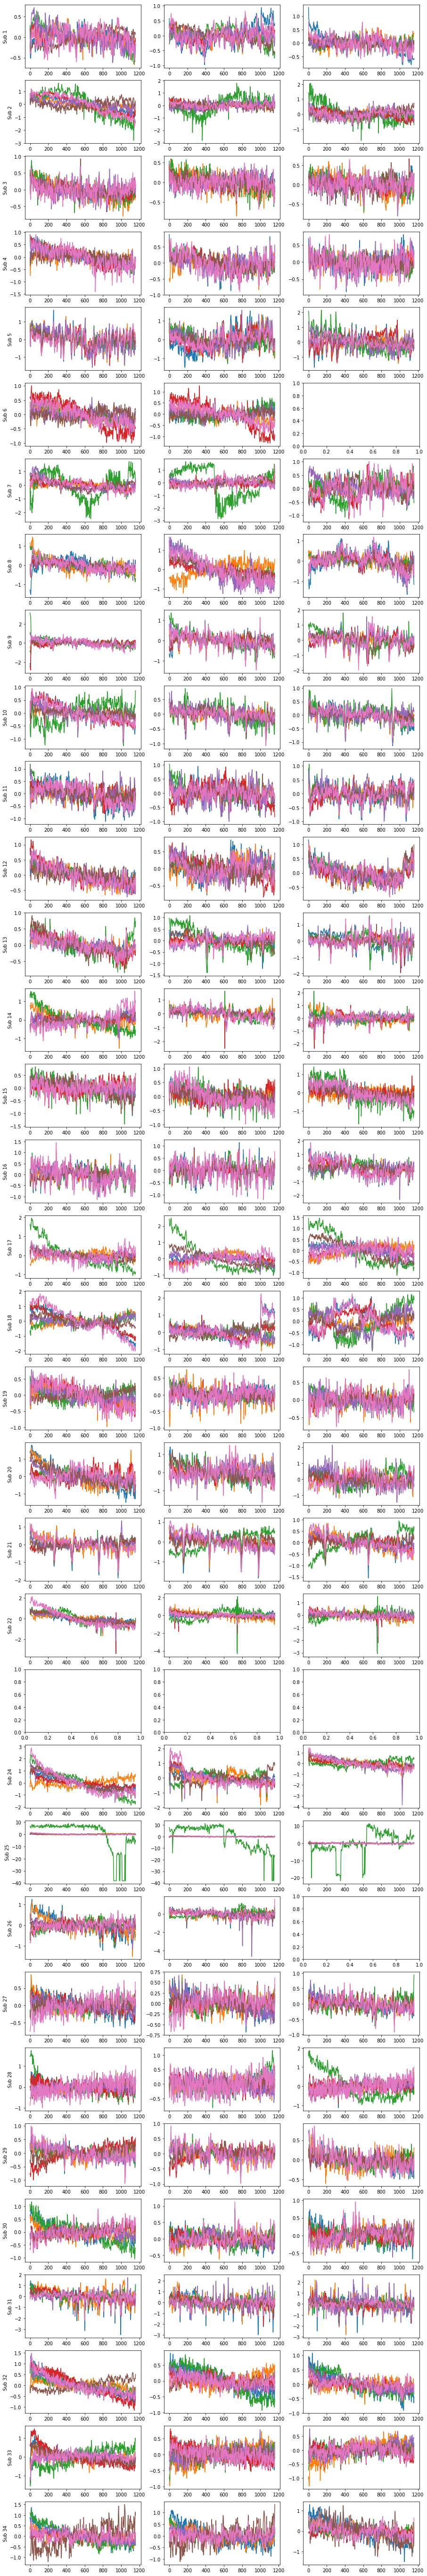

In [76]:
f, ax = plt.subplots(34, 3)
for sub in df.reset_index()['subject'].unique():
    for run in df.loc[sub].reset_index()['run'].unique():
        ax[sub-1,run-1].plot(df.loc[sub, run])
    ax[sub-1,0].set_ylabel('Sub {}'.format(sub))
    
f.set_size_inches(15, 100)

## Deconvolve overall

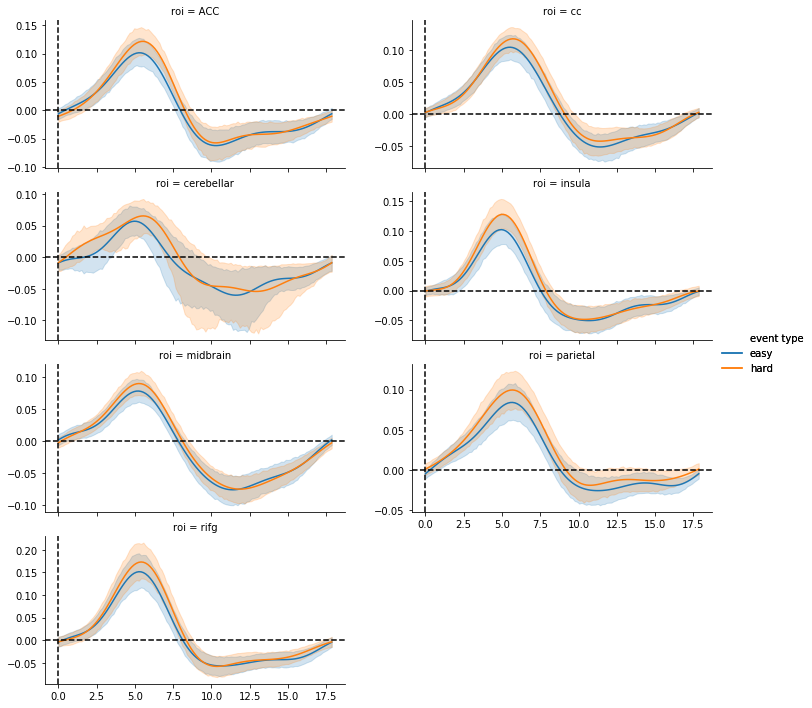

In [52]:
events_ = events.copy()
events_.loc[events_['event_type'].isin(['cue_left', 'cue_right', 'cue_neutral']), 'event_type'] = 'cue'
#events_.loc[events_['event_type'].isin(['easy', 'hard']), 'event_type'] = 'stim'
events_ = events_[events_['event_type'].isin(['easy', 'hard', 'cue'])]
#del events_['duration']

gf = nideconv.GroupResponseFitter(df, events_, 1/3., confounds=confounds.fillna(0))
#gf.add_event('cue', interval=[0, 18], basis_set='fourier', n_regressors=9)
#gf.add_event('stim', interval=[0, 18], basis_set='fourier', n_regressors=9)
gf.add_event('easy', interval=[0, 18], basis_set='fourier', n_regressors=9)
gf.add_event('hard', interval=[0, 18], basis_set='fourier', n_regressors=9)

gf.fit()
gf.plot_groupwise_timecourses(event_types=['easy', 'hard', 'cue'],
                              ci=95, plots='covariate', col='roi', col_wrap=2)

## Leipzig

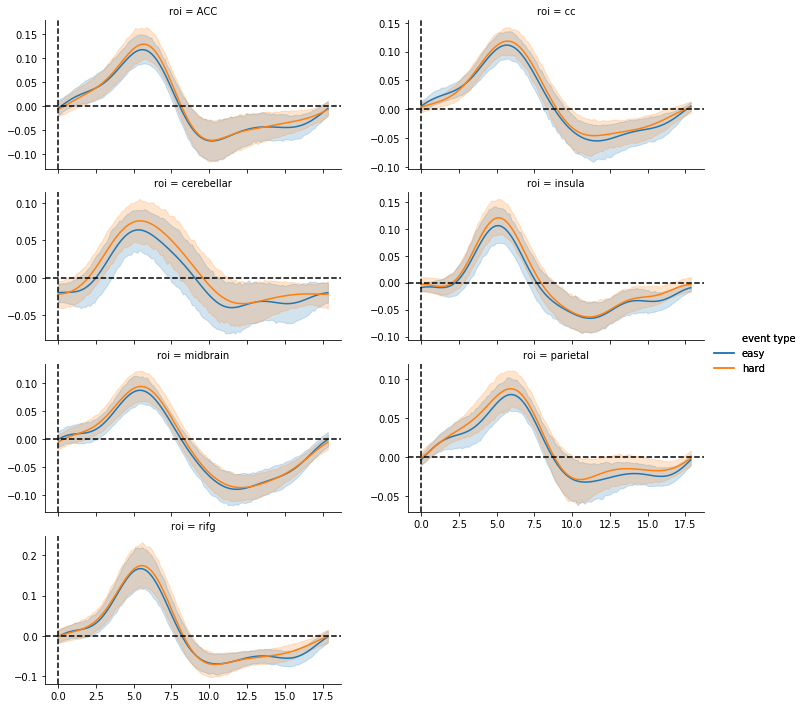

In [78]:
events_ = events.copy().loc[:19]
events_ = events_[events_['event_type'].isin(['easy', 'hard'])]
del events_['duration']
df_ = df.loc[:19]
confounds_ = confounds_deconv.copy().loc[:19]

gfL2 = nideconv.GroupResponseFitter(df_, events_, 1/3., confounds=confounds_.reset_index(), 
                                  oversample_design_matrix=20, concatenate_runs=True)
gfL2.add_event('easy', interval=[0, 18], basis_set='fourier', n_regressors=9)
gfL2.add_event('hard', interval=[0, 18], basis_set='fourier', n_regressors=9)

gfL2.fit()
gfL2.plot_groupwise_timecourses(event_types=['easy', 'hard'], #, 'stim', 'cue'],
                                ci=95, plots='covariate', col='roi', col_wrap=2)

In [79]:
ACC = gfL2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['ACC'].reset_index(level=[1,2], drop=True))
cc = gfL2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['cc'].reset_index(level=[1,2], drop=True))
cerebellar = gfL2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['cerebellar'].reset_index(level=[1,2], drop=True))
insula = gfL2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['insula'].reset_index(level=[1,2], drop=True))
midbrain = gfL2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['midbrain'].reset_index(level=[1,2], drop=True))
parietal = gfL2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['parietal'].reset_index(level=[1,2], drop=True))
rifg = gfL2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['rifg'].reset_index(level=[1,2], drop=True))

L2_peaktimes = pd.concat([ACC['easy'], cc['easy'], cerebellar['easy'], insula['easy'], midbrain['easy'], parietal['easy'], rifg['easy']], axis=1)
L2_peaktimes.columns = ['ACC', 'cc', 'cerebellar', 'insula', 'midbrain', 'parietal', 'rifg']
display(L2_peaktimes)
display(L2_peaktimes.mean(0))

ACC     cc  cerebellar  insula  midbrain  parietal  rifg
subject                                                           
1        5.25   5.40        4.65    4.80      5.40      6.60  5.55
2        6.60   5.85        6.00    5.25      6.45      6.45  3.75
3        6.00   6.15        5.40    5.55      5.55      5.85  5.85
4        5.40   5.40        4.20    5.25      4.95      5.10  5.70
5        5.85   5.40        7.20    1.65      5.40      5.55  5.10
6        5.70   6.15        7.65    5.40      5.25      6.45  5.70
7        7.35   6.90        8.55    6.15      7.35      8.10  7.50
8        5.10   5.55        4.65    4.95      5.25      5.10  4.95
9        5.70   7.35        5.10    5.55      5.40      6.90  5.55
10       3.90   4.80        7.20    3.75      5.55      5.85  4.05
11       5.70   5.10        4.80    5.10      5.55      5.85  5.10
12       5.85   6.00        5.55    5.55      5.55      6.00  5.55
13       5.70   5.70        6.00    5.25      1.80      6.30  5.40
14       6.00   6.75       12.60    5.55      4.95      5.85  5.25
15       4.95   5.40        4.95    4.50      5.10      5.40  5.55
16       5.40  11.25        3.60    4.50      4.95      5.85  5.10
17       6.15   5.55        5.25    5.40      5.40      6.00  5.85
18       4.95   5.70        7.05    5.10      6.45      5.40  5.55
19       5.40   6.30        4.35    4.95      5.40      8.85  5.55

ACC           5.628947
cc            6.142105
cerebellar    6.039474
insula        4.957895
midbrain      5.352632
parietal      6.181579
rifg          5.400000
dtype: float64

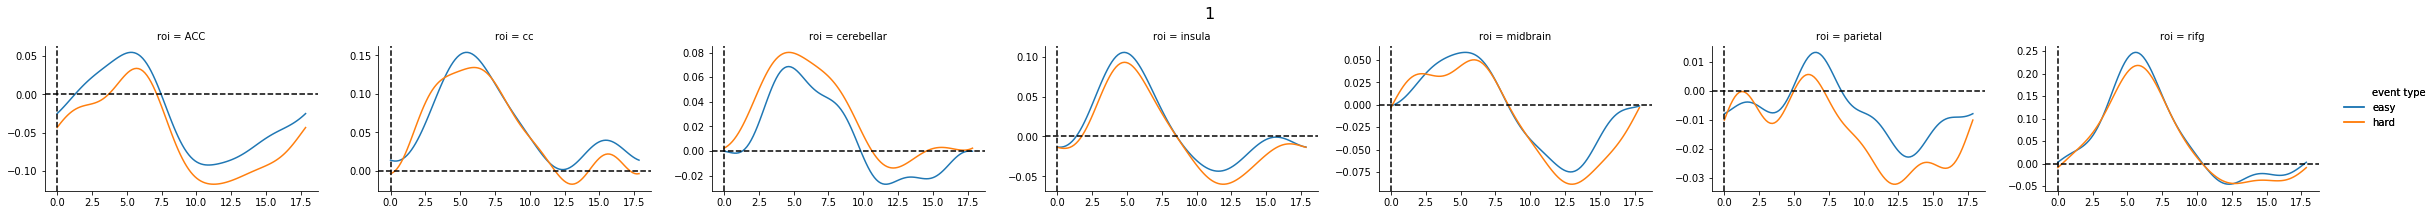

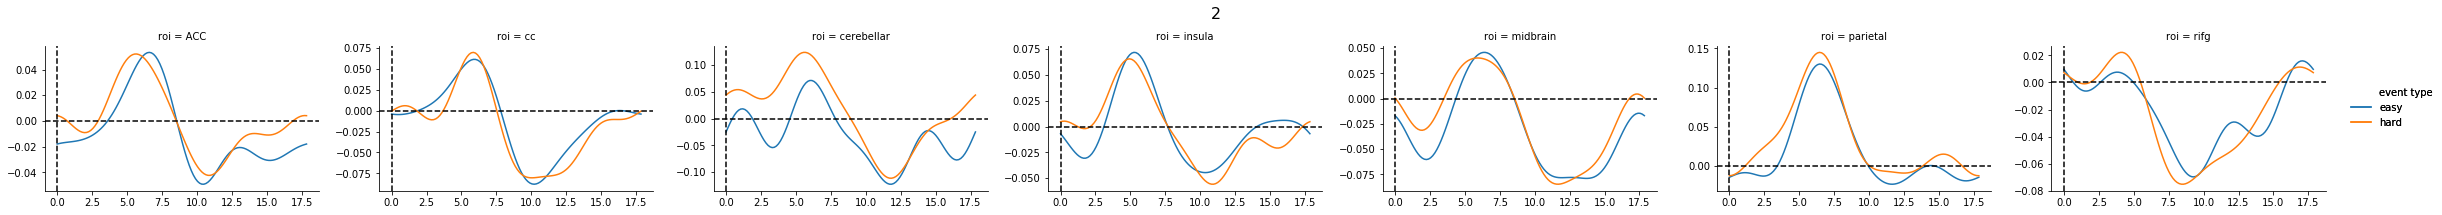

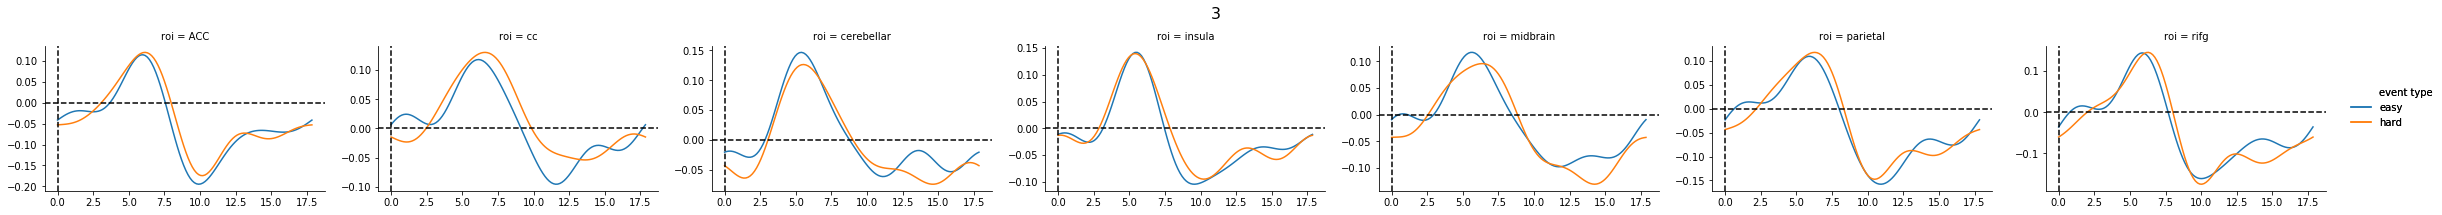

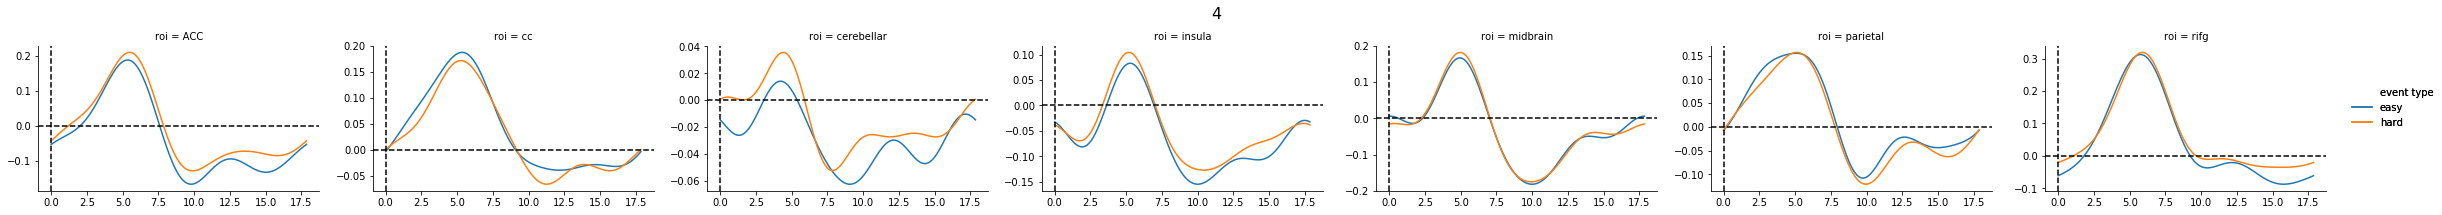

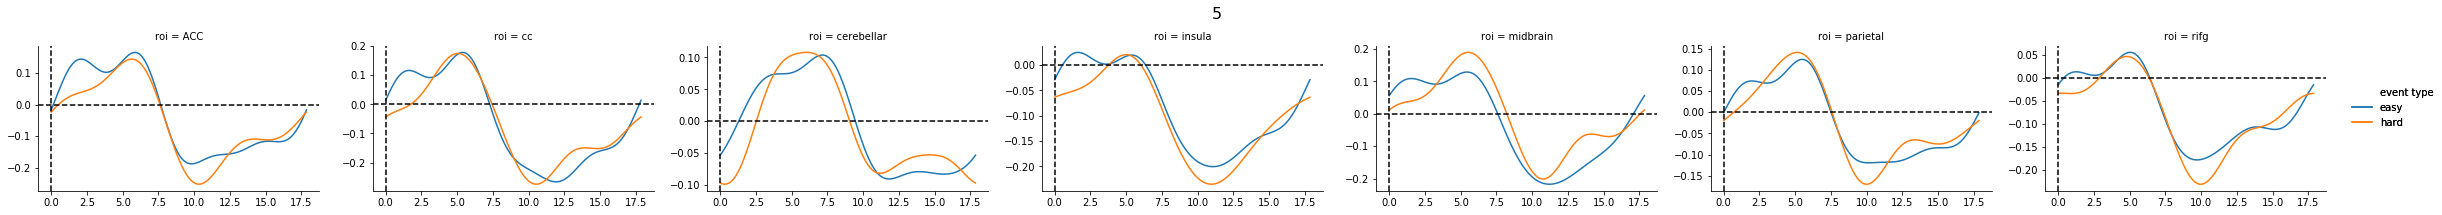

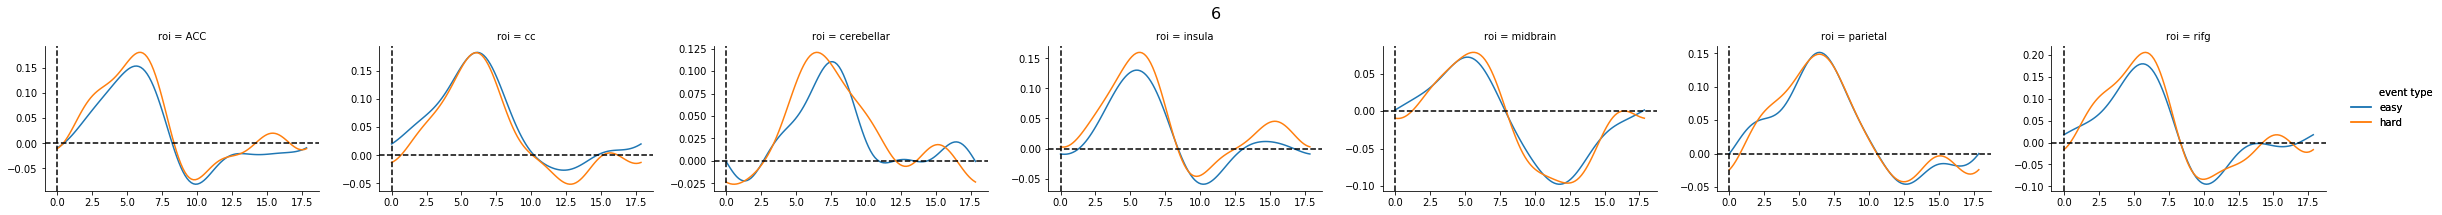

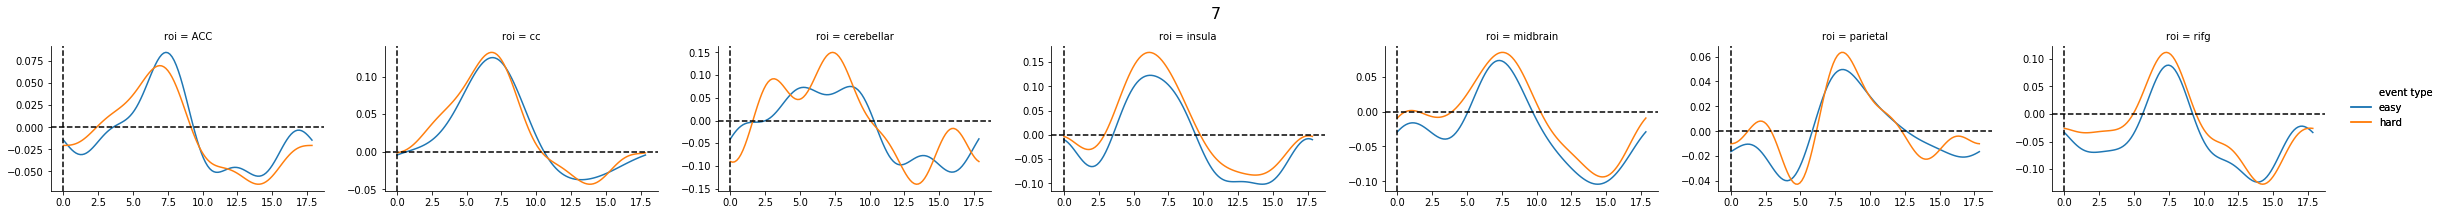

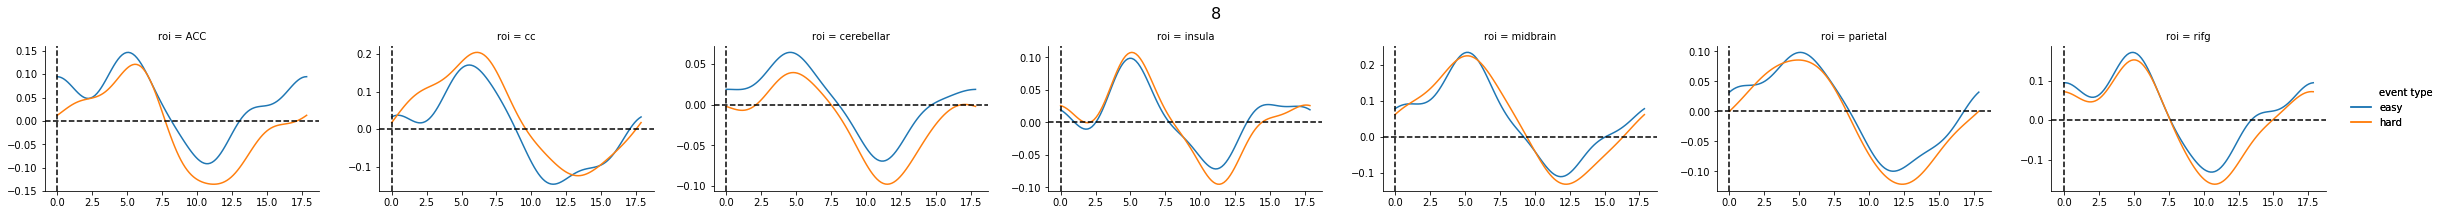

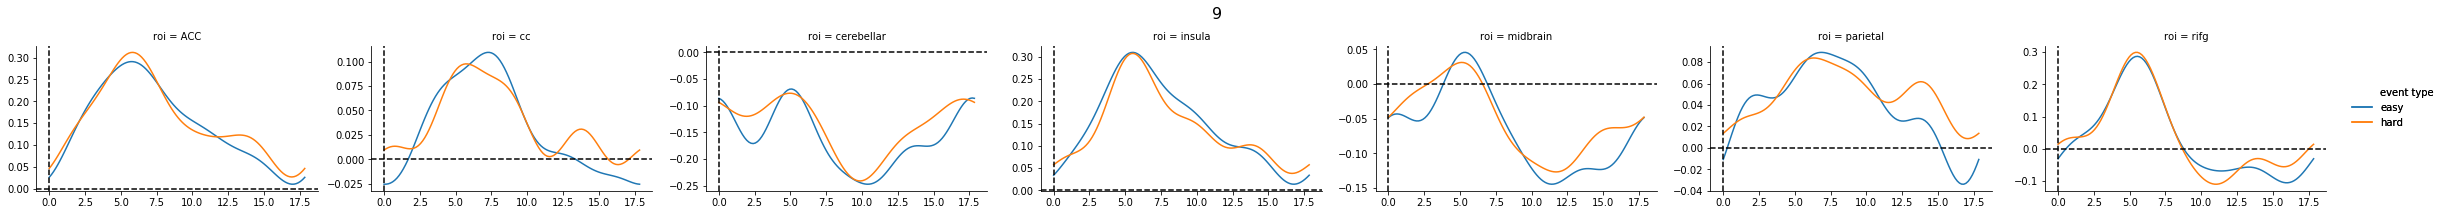

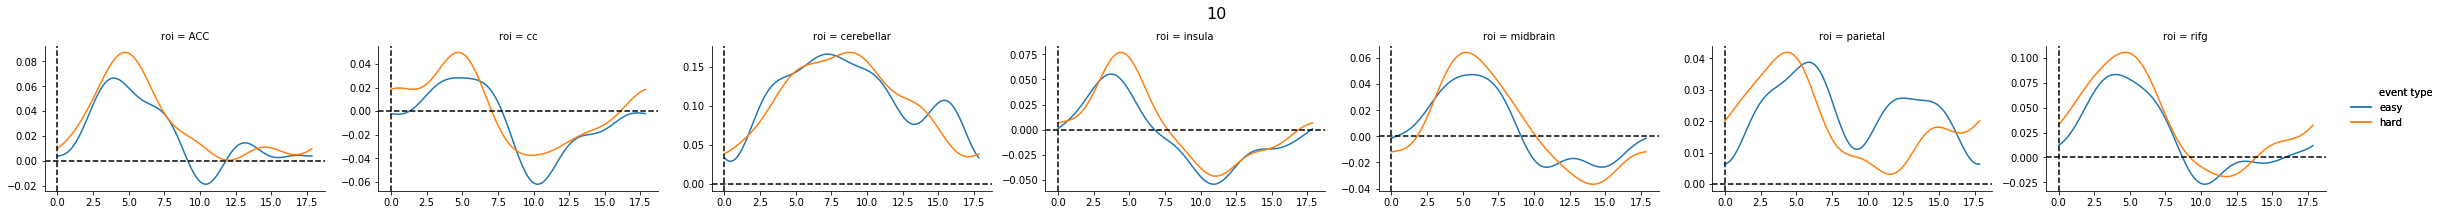

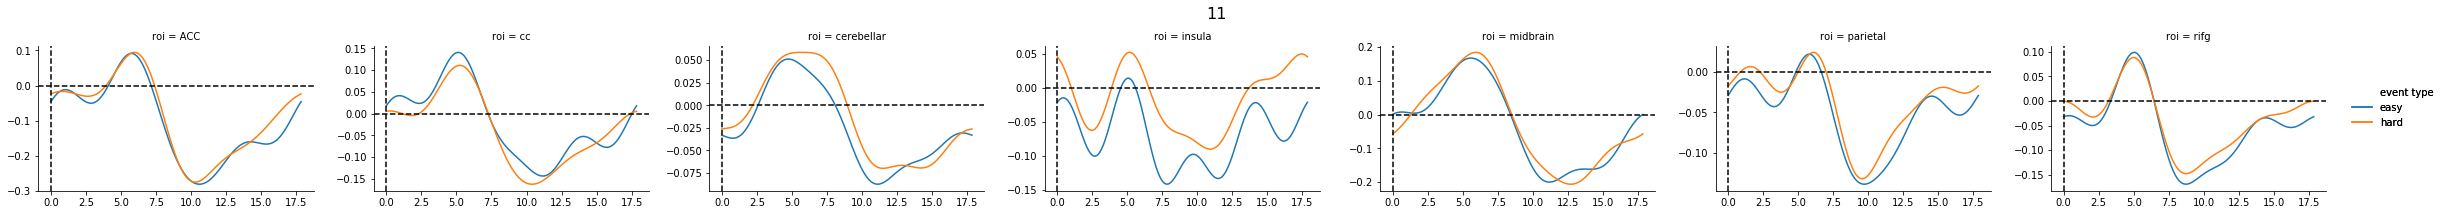

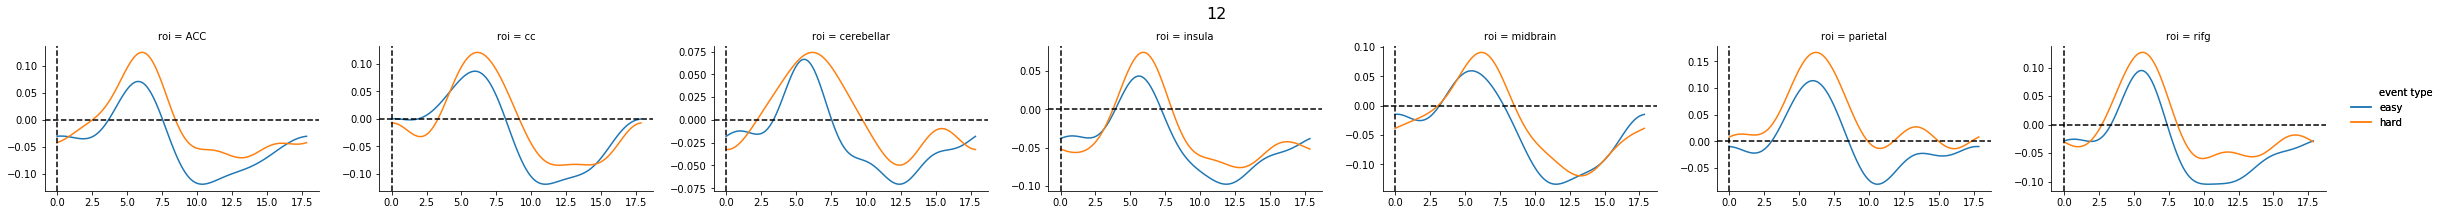

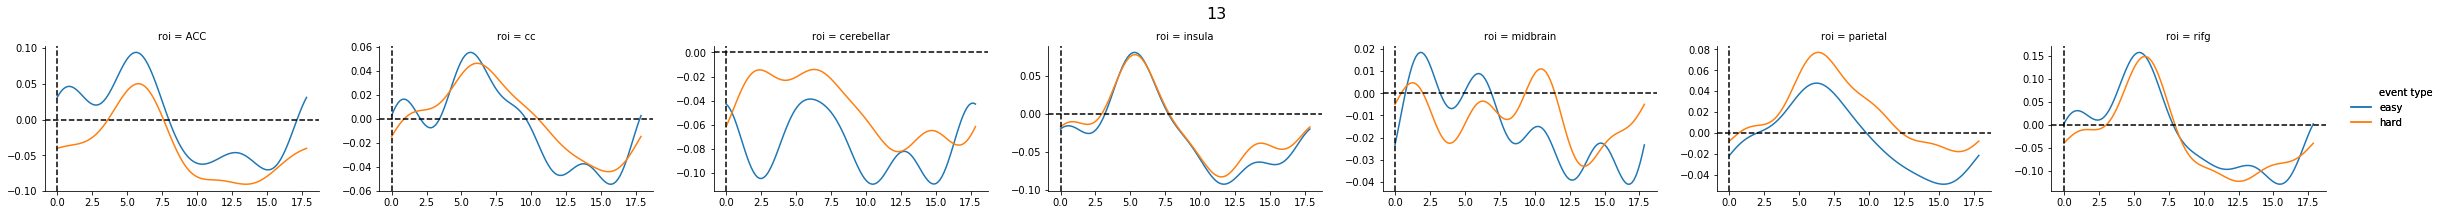

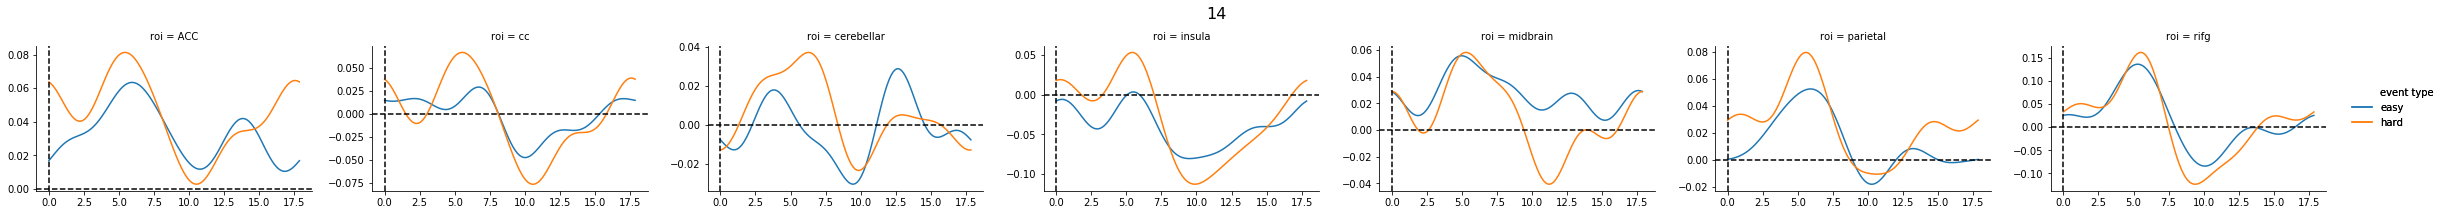

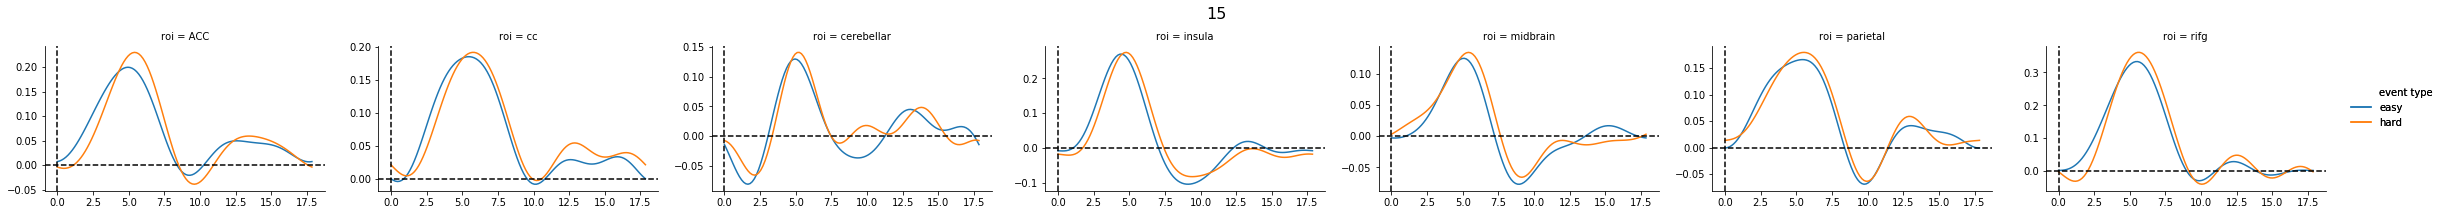

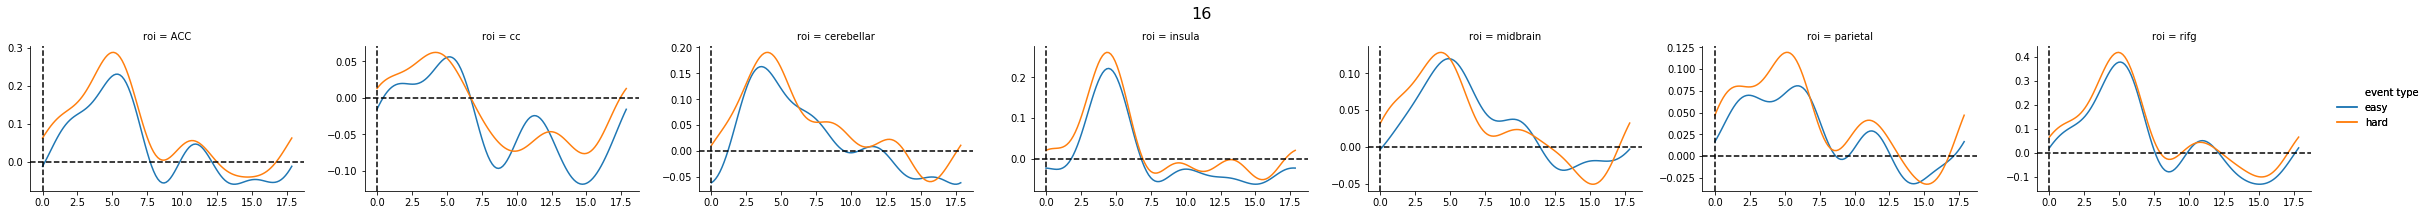

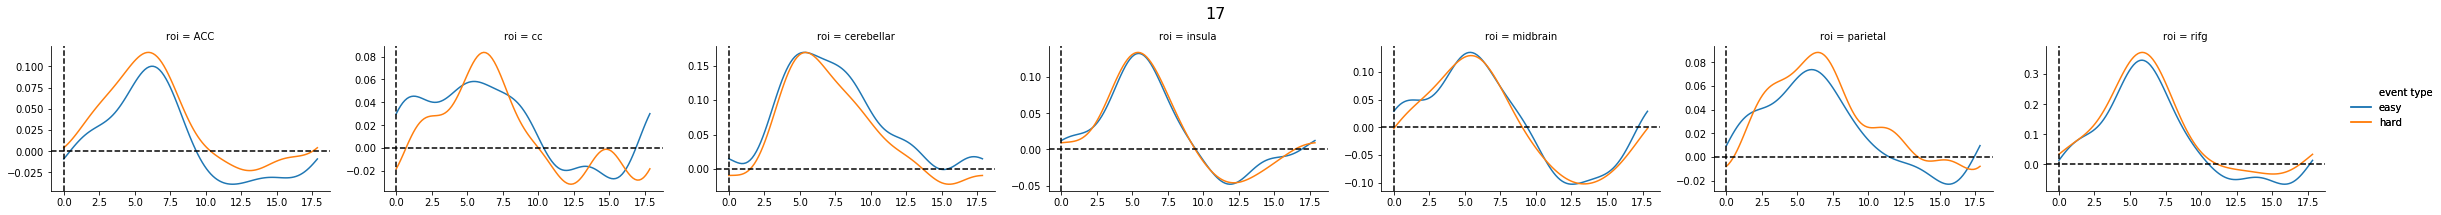

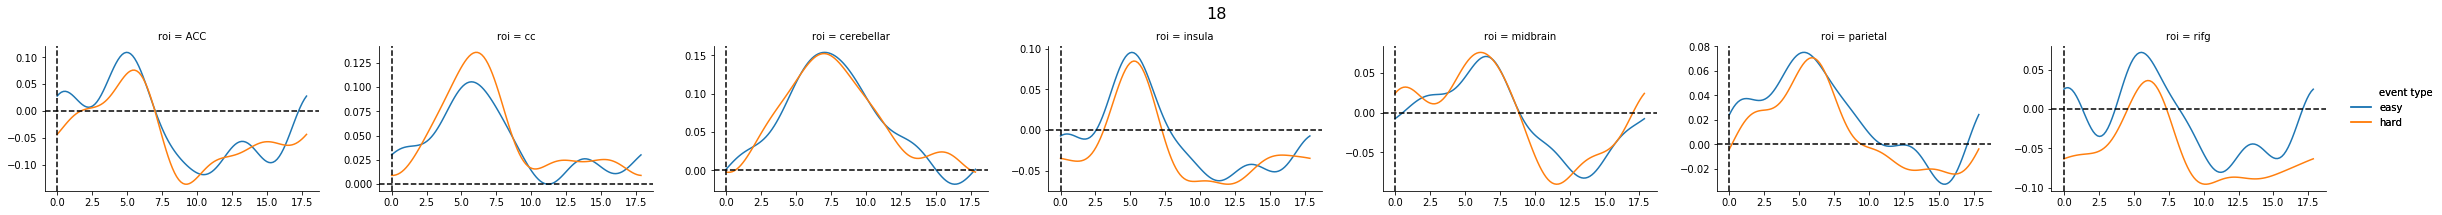

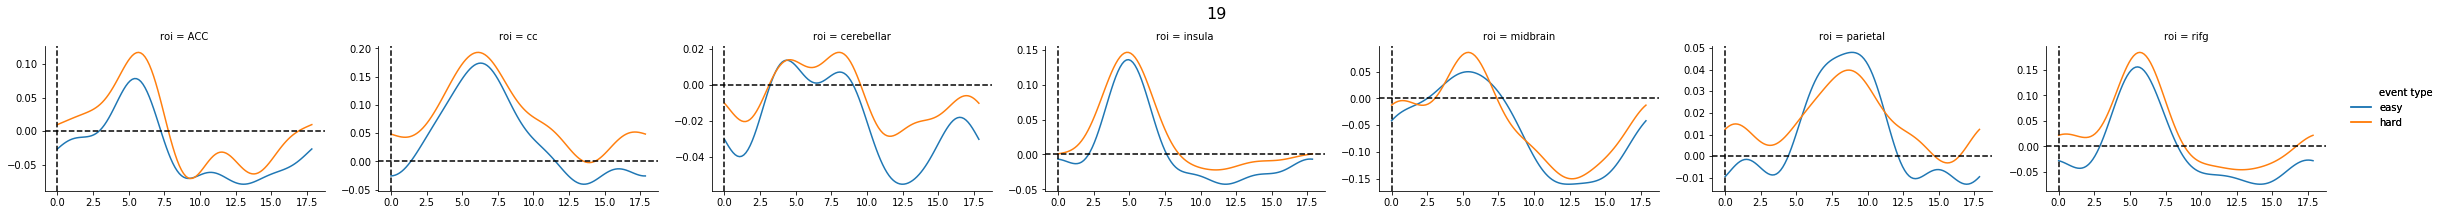

In [80]:
gfL2.plot_subject_timecourses(event_types=['easy', 'hard'], 
                              row=None, col='roi', plots='subject', col_wrap=None)

## Amsterdam

/home/stevenm/.conda/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2819: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


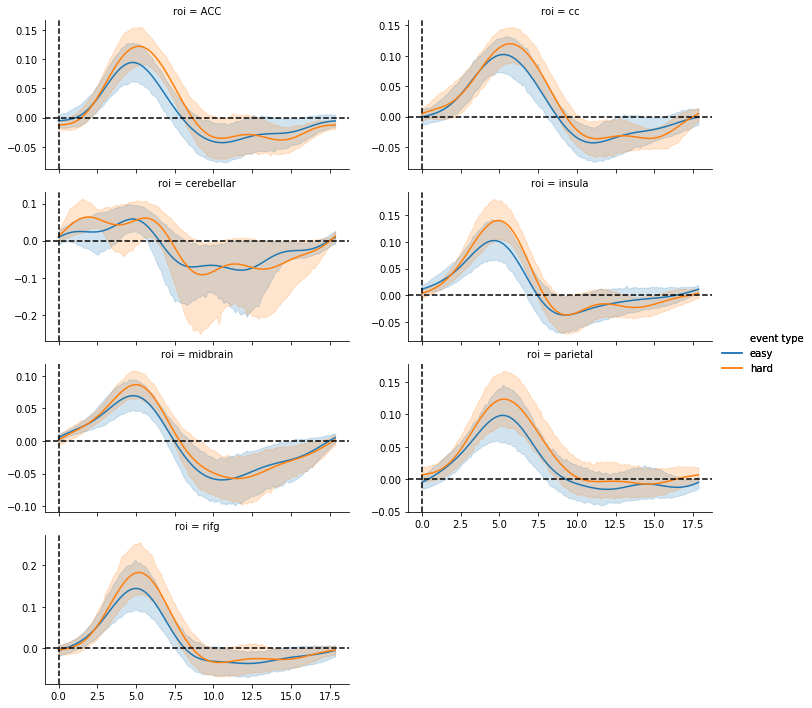

In [81]:
events_ = events.copy().loc[20:]
events_ = events_[events_['event_type'].isin(['easy', 'hard'])]
del events_['duration']
df_ = df.loc[20:]
confounds_ = confounds_deconv.copy().loc[20:] #.reset_index()

gfA2 = nideconv.GroupResponseFitter(df_, events_, 1/3., confounds=confounds_.fillna(0).reset_index(), 
                                    oversample_design_matrix=20)
gfA2.add_event('easy', interval=[0, 18], basis_set='fourier', n_regressors=9)
gfA2.add_event('hard', interval=[0, 18], basis_set='fourier', n_regressors=9)
# gfA2.add_event('response_left', interval=[0, 18], basis_set='fir')#, n_regressors=9)
# gfA2.add_event('response_right', interval=[0, 18], basis_set='fir')#, n_regressors=9)

gfA2.fit()
gfA2.plot_groupwise_timecourses(event_types=['easy', 'hard'], #, 'stim', 'cue'],
                                ci=95, plots='covariate', col='roi', col_wrap=2)

In [82]:
ACC = gfA2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['ACC'].reset_index(level=[1,2], drop=True))
cc = gfA2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['cc'].reset_index(level=[1,2], drop=True))
cerebellar = gfA2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['cerebellar'].reset_index(level=[1,2], drop=True))
insula = gfA2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['insula'].reset_index(level=[1,2], drop=True))
midbrain = gfA2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['midbrain'].reset_index(level=[1,2], drop=True))
parietal = gfA2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['parietal'].reset_index(level=[1,2], drop=True))
rifg = gfA2._get_response_fitters().apply(lambda x: x.get_time_to_peak()['rifg'].reset_index(level=[1,2], drop=True))

A2_peaktimes = pd.concat([ACC['easy'], cc['easy'], cerebellar['easy'], insula['easy'], midbrain['easy'], parietal['easy'], rifg['easy']], axis=1)
A2_peaktimes.columns = ['ACC', 'cc', 'cerebellar', 'insula', 'midbrain', 'parietal', 'rifg']
display(A2_peaktimes)
display(A2_peaktimes.mean(0))

ACC     cc  cerebellar  insula  midbrain  parietal   rifg
subject                                                             
20        6.15   5.70        5.70    6.15      4.50      5.55   5.55
21        5.55   5.40        4.65    6.00      5.85      5.10   5.25
22        4.50   4.65        4.05    4.95      4.65      2.70   4.65
24        4.95   5.10        6.15    5.10      1.65      5.70   5.25
25        3.90   5.70        4.80    3.45      5.10      4.95   5.10
26       12.30  12.75        5.70   11.40     10.80     13.80   6.00
27        4.35   3.90        4.50    4.05      4.20      4.35   4.35
28        4.50   5.40        3.75    4.65      4.65      5.10   4.65
29        8.40   4.20        4.20    4.50      4.95      3.90  11.55
30        4.50   4.50        2.55    3.75      3.75      4.35   4.50
31        5.70   5.25        4.95    2.10      3.75      5.10   4.50
32        4.95   5.10       13.65    4.20      3.75      4.20   4.35
33        4.80   6.60        5.40    4.65      5.25      5.25   5.70
34        4.80   4.80        5.25    4.80     15.00      6.15   5.25

ACC           5.667857
cc            5.646429
cerebellar    5.378571
insula        4.982143
midbrain      5.560714
parietal      5.442857
rifg          5.475000
dtype: float64

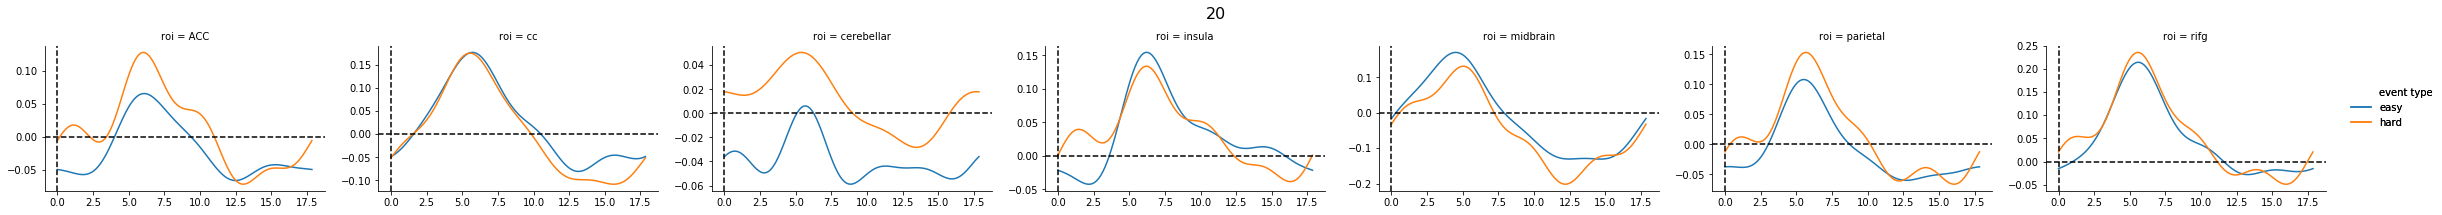

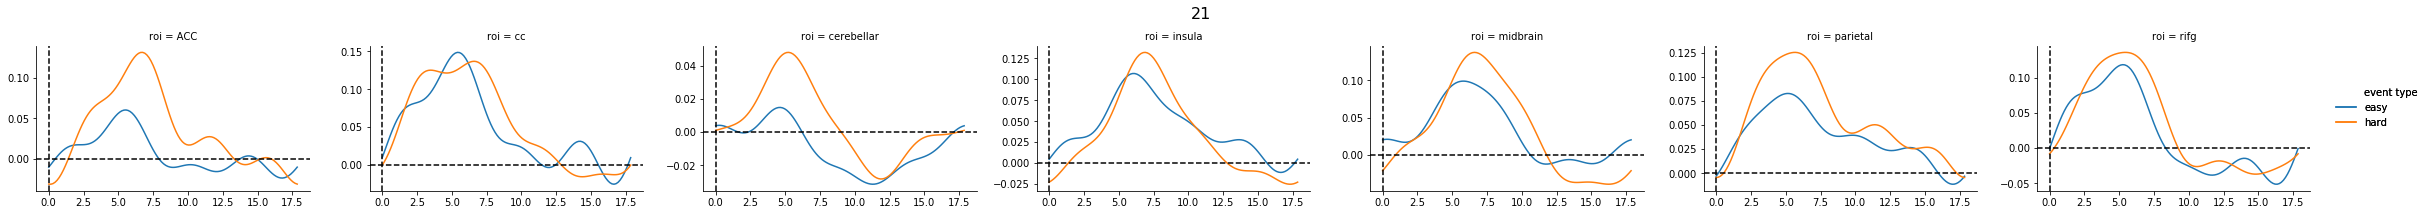

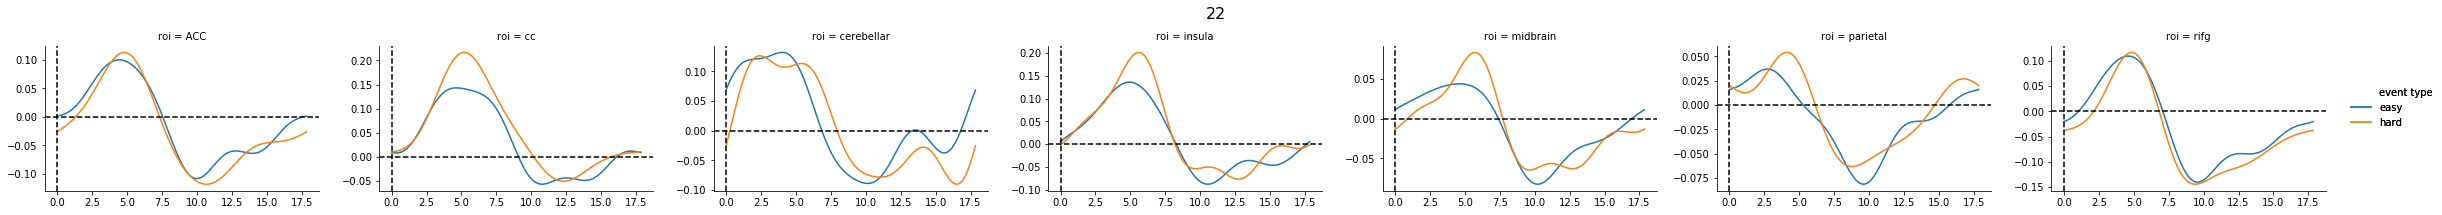

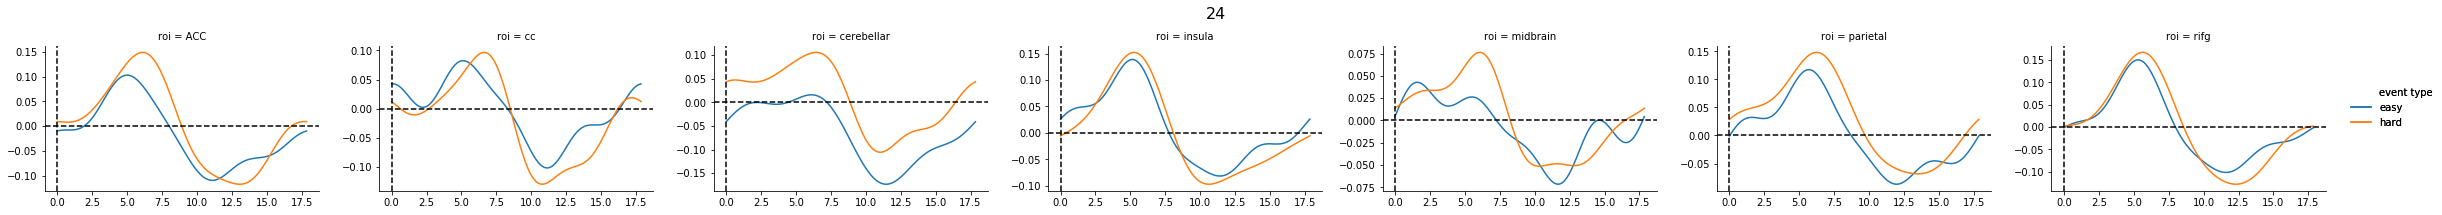

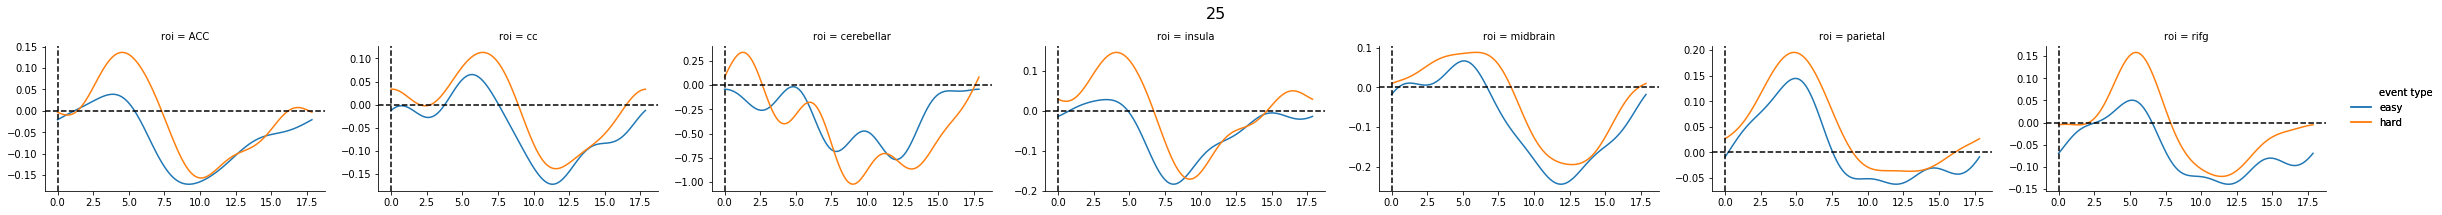

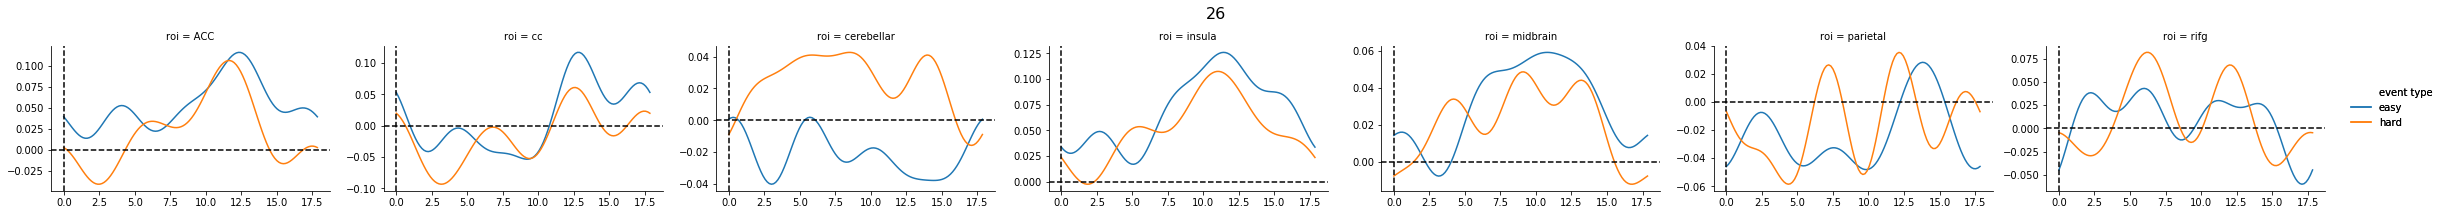

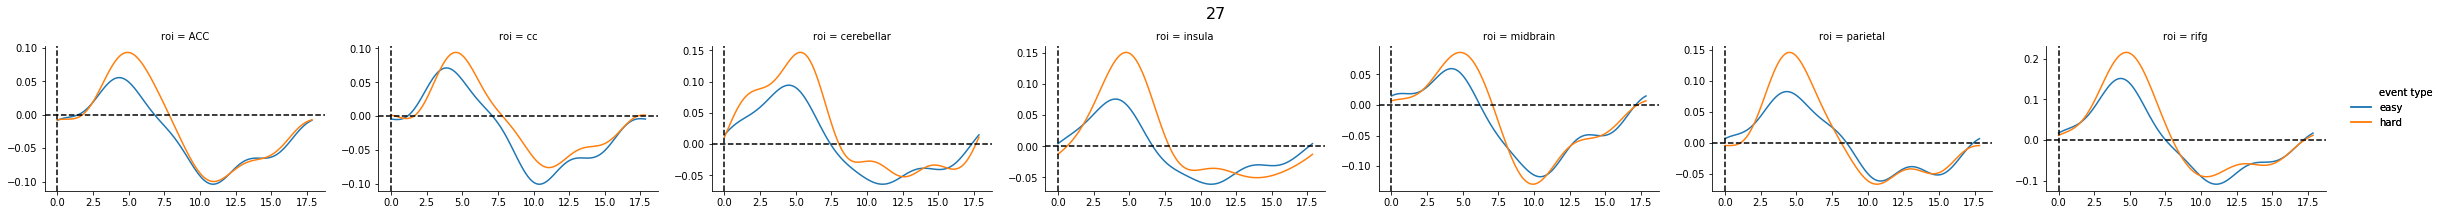

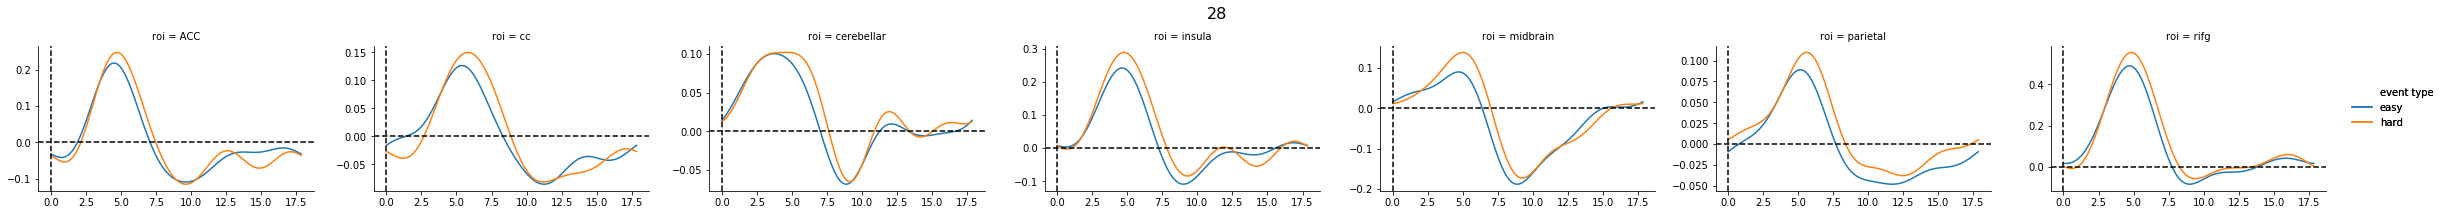

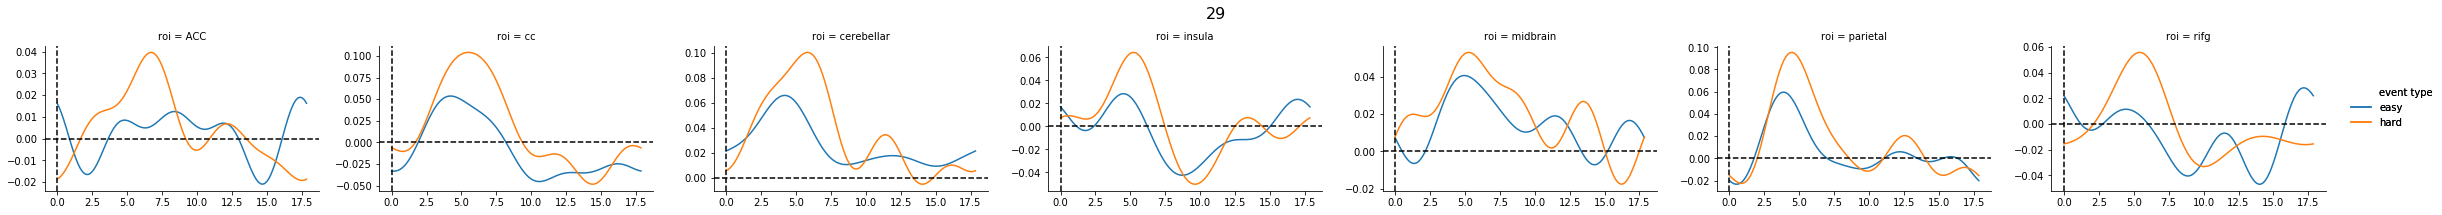

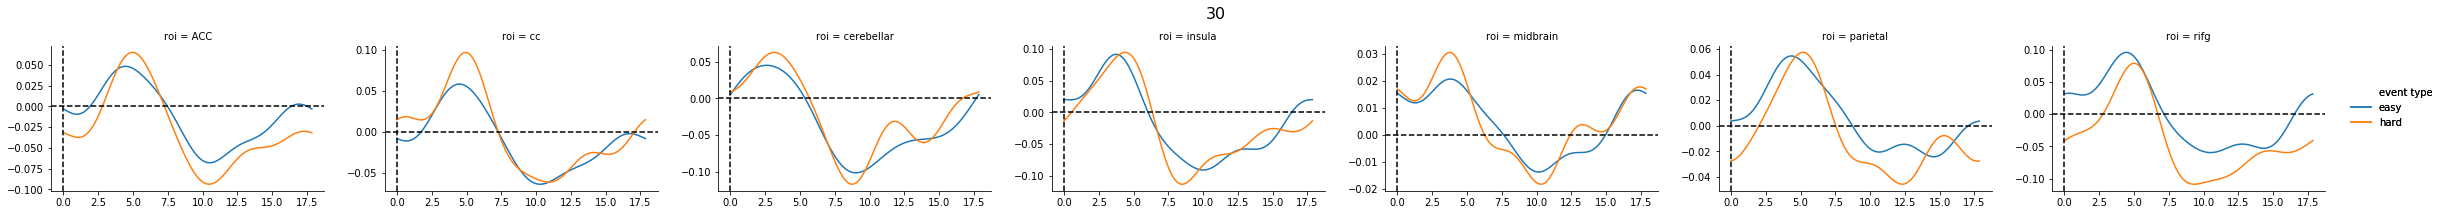

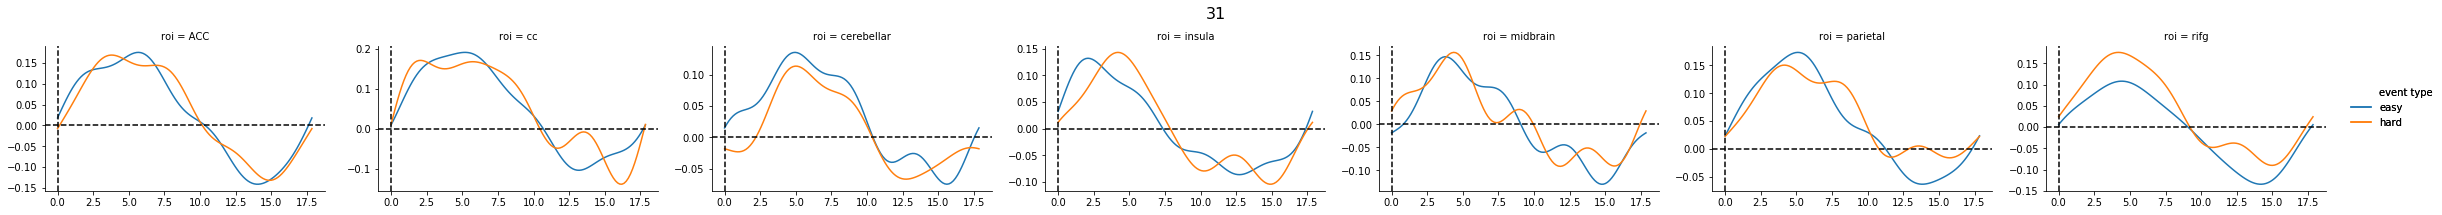

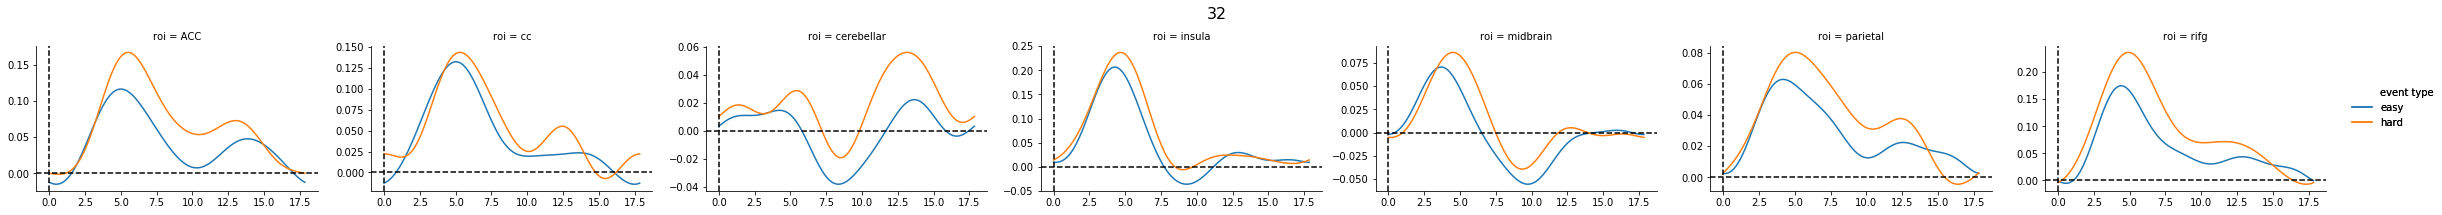

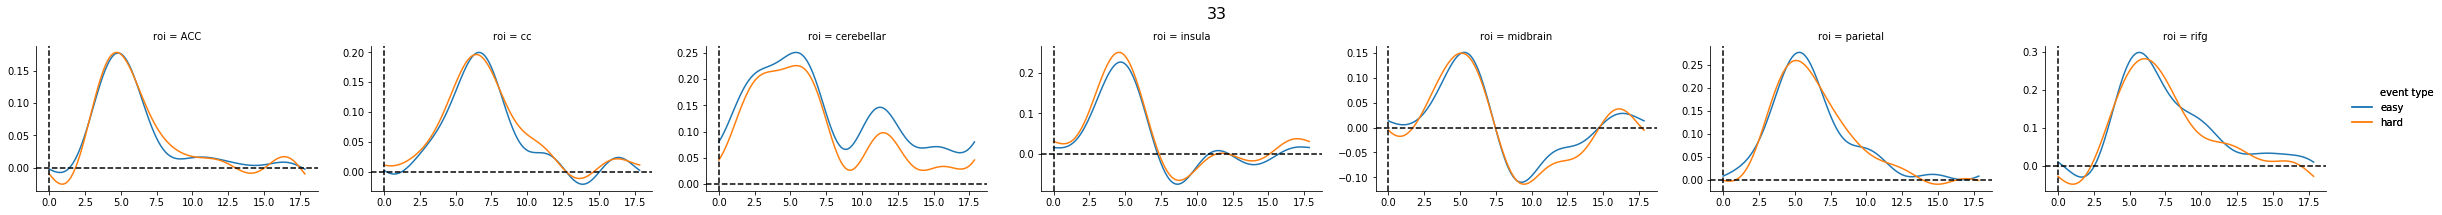

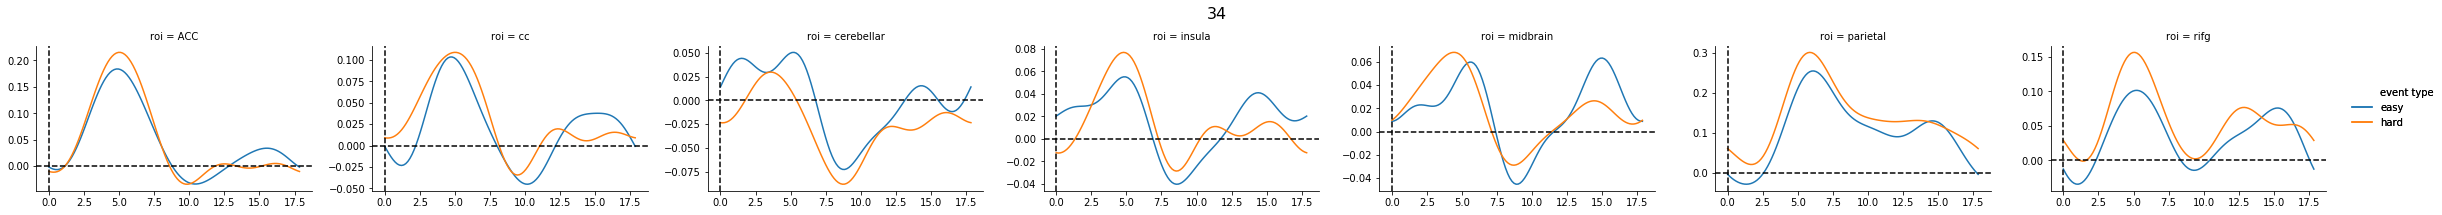

In [83]:
gfA2.plot_subject_timecourses(event_types=['easy', 'hard'], row=None, col='roi', plots='subject', col_wrap=None)

# Compare time to peak

In [84]:
all_peaktimes = pd.concat([L2_peaktimes, A2_peaktimes])
all_peaktimes['ds'] = np.hstack([np.repeat(1, 19), np.repeat(2, 14)])
all_peaktimes_mean = all_peaktimes.groupby('ds').median()
all_peaktimes_mean

ACC     cc  cerebellar  insula  midbrain  parietal   rifg
ds                                                             
1   5.700  5.700       5.400    5.25      5.40      5.85  5.550
2   4.875  5.175       4.875    4.65      4.65      5.10  5.175

- in ACC, "corpus callosum", partieal, and rIFG, the Leipzig data seems to peak ~0.8 - 1.5s later than the amsterdam data
- In cerebellum, insula, midbrain the differences are in the opposite direction and a bit smaller (0.6-0.9s)

We can add the z-locations of these ROIs to see if this could explain the difference in peak time

In [85]:
all_peaktimes_mean2 = all_peaktimes_mean.T
all_peaktimes_mean2['diff'] = all_peaktimes_mean2[1]-all_peaktimes_mean2[2]
all_peaktimes_mean2['com_z'] = [39, 29, -25, 4, 8, 42, 30]
all_peaktimes_mean2

ds             1      2   diff  com_z
ACC         5.70  4.875  0.825     39
cc          5.70  5.175  0.525     29
cerebellar  5.40  4.875  0.525    -25
insula      5.25  4.650  0.600      4
midbrain    5.40  4.650  0.750      8
parietal    5.85  5.100  0.750     42
rifg        5.55  5.175  0.375     30

Text(0, 0.5, 'Difference in peak onset')

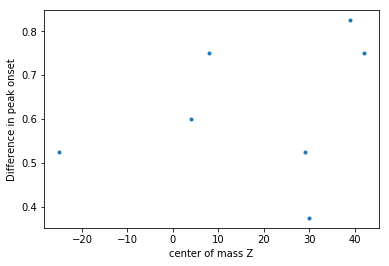

In [86]:
plt.plot(all_peaktimes_mean2['com_z'], all_peaktimes_mean2['diff'], '.')
plt.xlabel('center of mass Z')
plt.ylabel('Difference in peak onset')

Text(0, 0.5, 'peak onset')

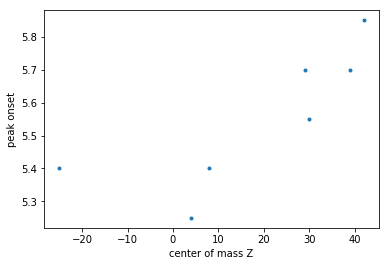

In [87]:
plt.plot(all_peaktimes_mean2['com_z'], all_peaktimes_mean2[1], '.')
plt.xlabel('center of mass Z')
plt.ylabel('peak onset')

Text(0, 0.5, 'peak onset')

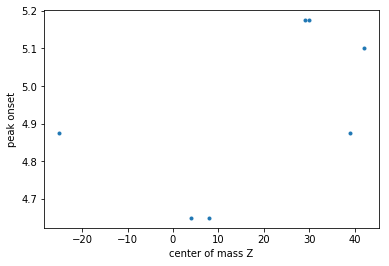

In [88]:
plt.plot(all_peaktimes_mean2['com_z'], all_peaktimes_mean2[2], '.')
plt.xlabel('center of mass Z')
plt.ylabel('peak onset')

#### Despite the low number of ROIs, there seems to be a strong correlation between the z-location and the *difference* in peak timing between datasets.
## In conclusion: one (or both) of the datasets probably still has/have the wrong slice timing correction.

In [70]:
## sigma2?
sigma2s_ds1 = gfL2._get_response_fitters().apply(lambda x: x.sigma2)
sigma2s_ds2 = gfA2._get_response_fitters().apply(lambda x: x.sigma2)
print(sigma2s_ds1.mean(0))
print(sigma2s_ds2.mean(0))

ACC           0.058151
cc            0.047448
cerebellar    0.067083
insula        0.037023
midbrain      0.050496
parietal      0.028638
rifg          0.065478
dtype: float64
ACC           0.047713
cc            0.071309
cerebellar    2.350896
insula        0.037120
midbrain      0.050712
parietal      0.050728
rifg          0.061821
dtype: float64
